In [1]:
import meshposition as mp
import utils as utl
import numpy as np
import matplotlib.pyplot as plt
import analyse_utils as atl

In [ ]:
# can optionally be called for capture, must be followed by mp.stop() to close the serial port
mp.start()

# RF Diagnosis

In [2]:
node_ids = mp.rf_get_active_short_ids()
utl.save_json_timestamp("config_twr",node_ids)

(Green) : (255)/(530BE91D3559D690)
(Wired) : (1)/(CBC216DC164B1DE8)
(Simple) : (2)/(5F7D70F99F462C99)


'./test_db/config_twr 2021.07.26 19-20-38.json'

In [3]:
mp.test_rf_ping_rssi("Wired", 3)
mp.test_rf_ping_rssi("Simple", 3)
mp.test_rf_ping_rssi("Green", 3)

test_ping(0)> rssi = 55
test_ping(1)> rssi = 55
test_ping(2)> rssi = 55
test_ping(0)> rssi = 68
test_ping(1)> rssi = 67
test_ping(2)> rssi = 68
test_ping(0)> rssi = 75
test_ping(1)> rssi = 75
test_ping(2)> rssi = 75


# UWB Diagnosis

In [4]:
diag_list = mp.get_list_uwb_ping_diag([("Wired","Simple"),("Wired","Green")], 100)
utl.save_json_timestamp("ping_twr",diag_list)

db_uwb_ping_diag> Skipping sequence 2 due to missing responses
db_uwb_ping_diag> Skipping sequence 37 due to missing responses
db_uwb_ping_diag> Skipping sequence 63 due to missing responses
db_uwb_ping_diag> Skipping sequence 67 due to missing responses
db_uwb_ping_diag> Skipping sequence 77 due to missing responses
db_uwb_ping_diag> (95)/(100)


In [2]:
diag_list = utl.load_json("./test_db/ping_twr 2021.07.26 19-23-57.json")

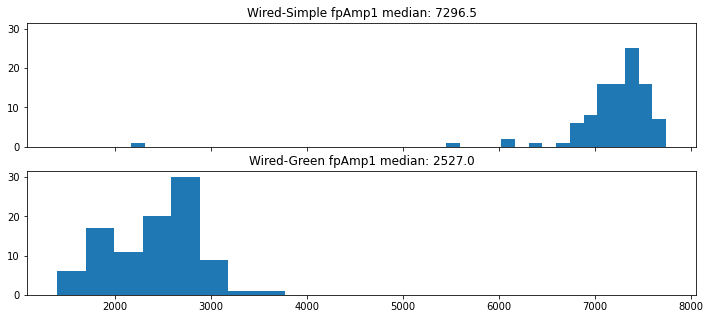

In [3]:
atl.plot_ping_list_param([("Wired","Simple"),("Wired","Green")],"fpAmp1", diag_list)

# Ranging

In [8]:
twr_list = mp.uwb_twr(initiator="Wired", responders=["Simple","Green"], step_ms=10, count=50, count_ms=30)
newFileName = utl.save_json_timestamp("res_twr",twr_list)

db_uwb_twr> 100 ranging saved in ./test_db/res_twr 2021.07.26 19-26-37.json


In [2]:
twr_list = utl.load_json("./test_db/res_twr 2021.07.26 19-26-37.json")

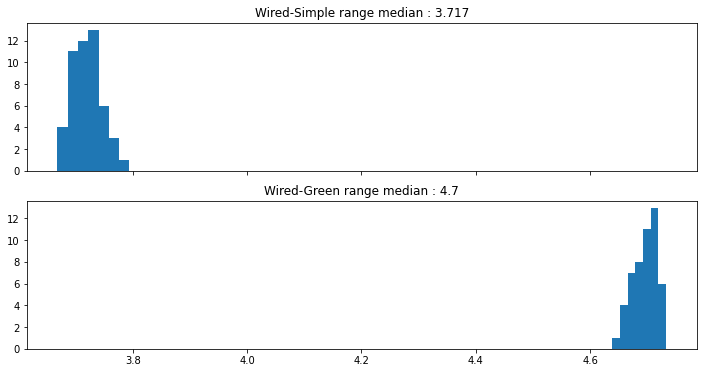

In [3]:
atl.plot_twr_list([("Wired","Simple"),("Wired","Green")], twr_list)

In [7]:
mp.stop()